<font color=black size=8>Moive Review Sentiment Analysis </font>

---

# Abstract
This article consists of a thorough analysis of Movie Review Sentiment Dataset from Kaggle, which contains movie reviews along with their associated sentiment polarity labels. Based on these reviews, it is possible to learn reviewers’ words and classify their aitudes into positive ones and negative ones.

## 1. INTRODUCTION

Nowadays, the method machine learning is extremly hot and has been used in wide range of area, NLP(Nature Language Processing) is just one of them. In this project, we are going to use CNN(Convolutinal Neural Network), LSTM(Long-Short-Term Memory) in RNN(Recurrent Neural Network), and Navie Bayes Based on words these three distincet method to evaluate their performence and find the best fitted one method

## 2. DATASET DESCRIPTION

First, we need to see what's the structure of the dataset

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from nltk.util import ngrams
from scipy.stats import norm 
from collections import Counter
from nltk.tokenize import TweetTokenizer
train=pd.read_csv('../input/train.tsv',sep='\t')
test= pd.read_csv('../input/test.tsv',sep='\t')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [3]:
train.loc[train.SentenceId==2]

,PhraseId,SentenceId,Phrase,Sentiment
63,64,2,"This quiet , introspective and entertaining in...",4
64,65,2,"This quiet , introspective and entertaining in...",3
65,66,2,This,2
66,67,2,"quiet , introspective and entertaining indepen...",4
67,68,2,"quiet , introspective and entertaining",3
68,69,2,quiet,2
69,70,2,", introspective and entertaining",3
70,71,2,introspective and entertaining,3
71,72,2,introspective and,3
72,73,2,introspective,2


**We can see from above that the dataset itself is split into 5 group**

* 0 -_Negative_ 
* 1 -_SomeWhat Negative_ 
* 2 -_Neutral_ 
* 3 -_SomeWhat Positive_ 
* 4 -_Positive_

and next we going to use the knowledge of class to see what's the distribution of these label, the shape of the distribution should like normal distribution if the data collected is reasonable 

### 2.1 Visualize the Data
---

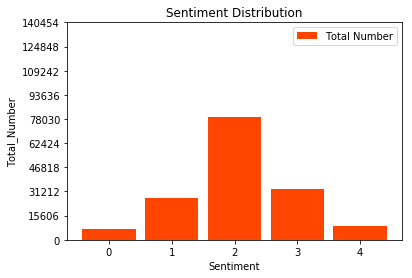

In [4]:
num_0=len(train.loc[train.Sentiment ==0])
num_1=len(train.loc[train.Sentiment ==1])
num_2=len(train.loc[train.Sentiment ==2])
num_3=len(train.loc[train.Sentiment ==3])
num_4=len(train.loc[train.Sentiment ==4])
index=[0,1,2,3,4]
values=[num_0,num_1,num_2,num_3,num_4]
p = plt.bar(index, values, width=0.85, label="Total Number", color="orangered")
plt.xlabel('Sentiment')
plt.ylabel('Total_Number')
plt.title('Sentiment Distribution')
plt.xticks(index)
plt.yticks(np.arange(0, len(train),len(train)//10))
plt.legend(loc="upper right")

plt.show()

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


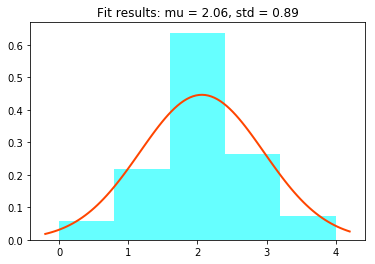

In [5]:
# Generate some data for this demonstration. 
data = train['Sentiment'] 

# Fit a normal distribution to the data: 
mu, std = norm.fit(data) 

# Plot the histogram. 
plt.hist(data, bins=5, normed=True, alpha=0.6, color='aqua') 
# Plot the PDF. 
xmin, xmax = plt.xlim() 
x = np.linspace(xmin, xmax, 100) 
p = norm.pdf(x, mu, std) 
plt.plot(x, p, 'orangered', linewidth=2) 
title = "Fit results: mu = %.2f, std = %.2f" % (mu, std) 
plt.title(title) 

plt.show() 

We can see that most phrases are neutral, followed by the 'somewhats' (somewhat positive - somewhat negative). Then, far behind are positive and negative phrases.

### 2.2 Split data using N gram algorithm 

N-gram Model is a very popular and widely used method to extract the main idea in a sentence,an n-gram is a contiguous sequence of n items from a given sample of text or speech. <br>
For example. if we have a sentence consists of **m** words, we want get the probablity of $p(w_{1},w_{2},...,w_{m})$<br>from the Total Probablity Law, we can get
$$p(w_{1},w_{2},...,w_{m})=p(w_{1})*p(w_{2}|w_{1})*p(w_{3}|w_{1},w_{2})*...p(w_{m}|w_{1},w_{2}....w_{m-1}) $$
It's to hard to calculate all the probablity so we use the Markov model, which is *the word we are predicting now is only relavent to serval words before* the number is **n**. so the function become
$$p(w_{1},w_{2},...,w_{m})=p(w_{i}|w_{i-n+1},....w_{m-1}) $$
In this particular dataset, we are going to use 3-ngram model, so the probablity function becom
$$p(w_{1},w_{2},...,w_{m})=\prod_{i=1}^mp(w_{i}|w_{i-2},w_{i-1})  $$

we are going to use the built in function **ngram** in **NLTK Library** to realize this function<br>
**use the positive phrase as example**

In [6]:
text = ' '.join(train.loc[train.Sentiment == 4, 'Phrase'].values)
text_trigrams = [i for i in ngrams(text.split(), 3)]
Counter(text_trigrams).most_common(30)

[(('one', 'of', 'the'), 199),
 (('of', 'the', 'year'), 103),
 (('.', 'is', 'a'), 87),
 (('of', 'the', 'best'), 80),
 (('of', 'the', 'most'), 70),
 (('is', 'one', 'of'), 50),
 (('One', 'of', 'the'), 43),
 ((',', 'and', 'the'), 40),
 (('the', 'year', "'s"), 38),
 (('It', "'s", 'a'), 38),
 (('it', "'s", 'a'), 37),
 (('.', "'s", 'a'), 37),
 (('a', 'movie', 'that'), 35),
 (('the', 'edge', 'of'), 34),
 (('the', 'kind', 'of'), 33),
 (('of', 'your', 'seat'), 33),
 (('the', 'film', 'is'), 31),
 ((',', 'this', 'is'), 31),
 (('the', 'film', "'s"), 31),
 ((',', 'the', 'film'), 30),
 (('film', 'that', 'is'), 30),
 (('as', 'one', 'of'), 30),
 (('edge', 'of', 'your'), 29),
 ((',', 'it', "'s"), 27),
 (('a', 'film', 'that'), 27),
 (('as', 'well', 'as'), 27),
 ((',', 'funny', ','), 25),
 ((',', 'but', 'it'), 23),
 (('films', 'of', 'the'), 23),
 (('some', 'of', 'the'), 23)]

**We can find that all the punctuation are counted as a part of the phrase, and the same letter is considered different because of thier case, All of these should be cleaned and not be counted. So we need to clean the data before we start traning. Now we are using another method called wordClould to see the most common word**

### 2.3 Using WordCloud  to show the common word

In [7]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,# get rid of the word like a, the and some punctuation 
        max_words=300,
        max_font_size=50, 
        scale=3,
        random_state=1).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

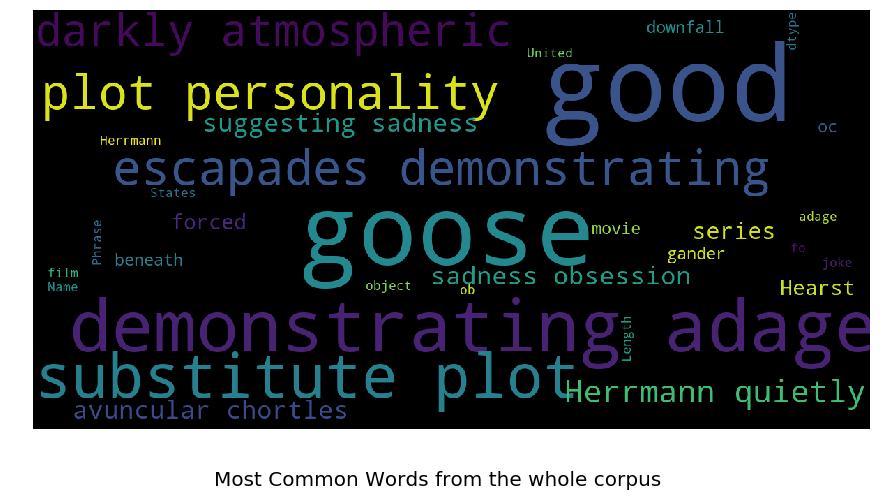

In [8]:
show_wordcloud(train['Phrase'],'Most Common Words from the whole corpus')

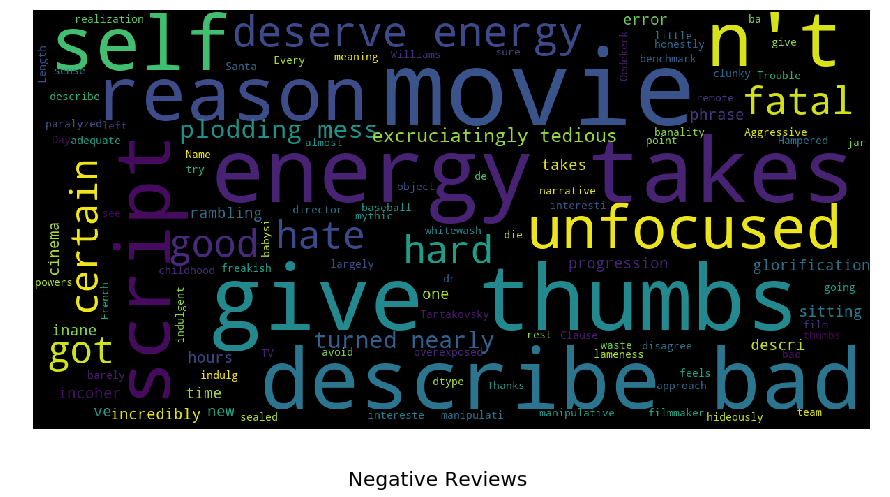

In [9]:
show_wordcloud(train[train['Sentiment'] == 0]['Phrase'],'Negative Reviews')

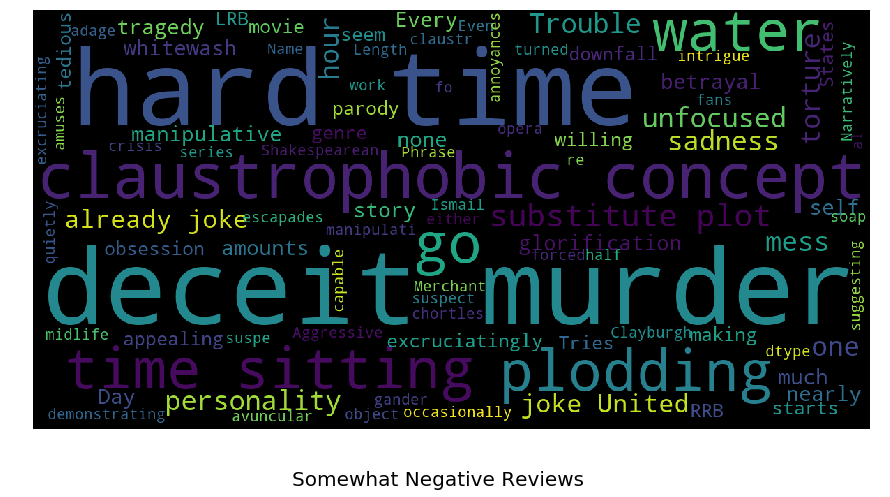

In [10]:
show_wordcloud(train[train['Sentiment'] == 1]['Phrase'],'Somewhat Negative Reviews')

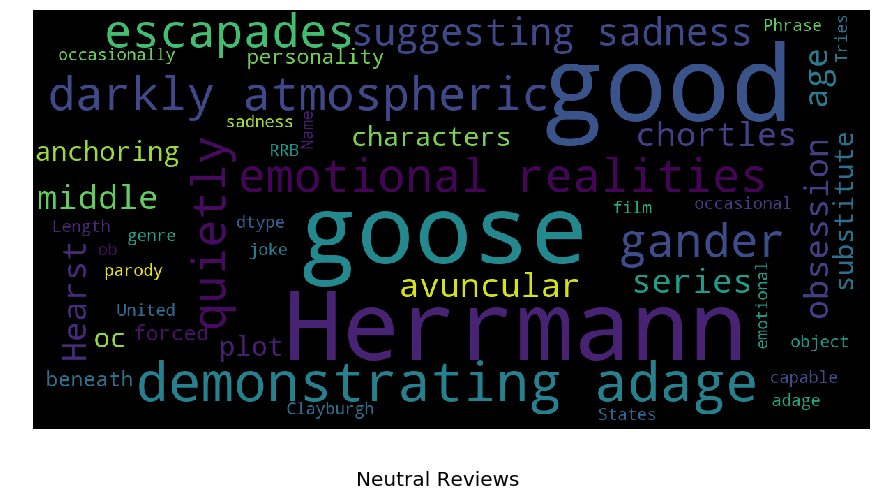

In [11]:
show_wordcloud(train[train['Sentiment'] == 2]['Phrase'],'Neutral Reviews')

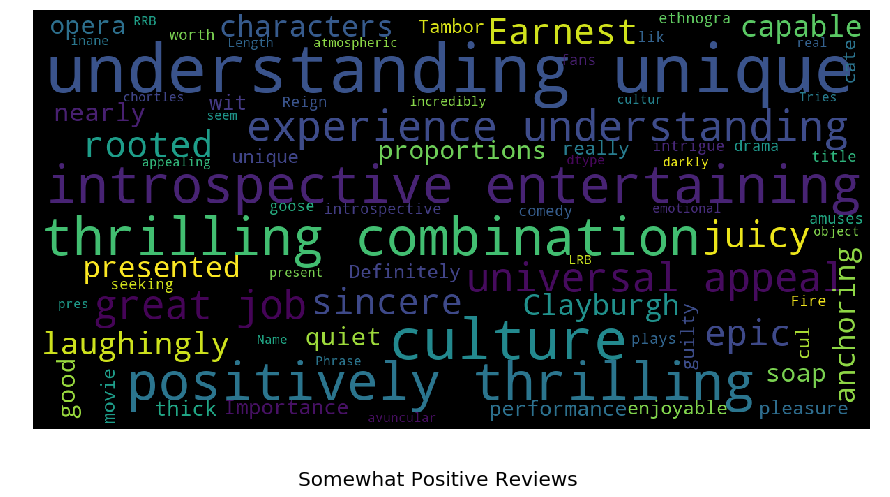

In [12]:
show_wordcloud(train[train['Sentiment'] == 3]['Phrase'],'Somewhat Positive Reviews')

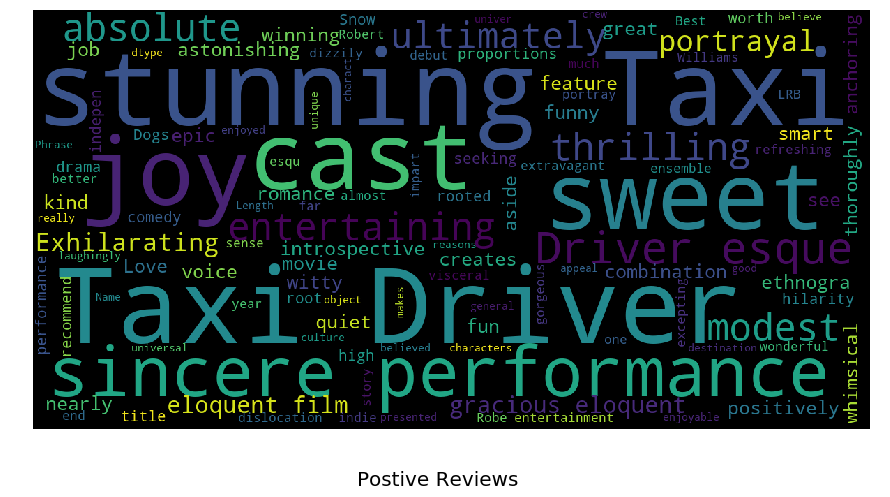

In [13]:
show_wordcloud(train[train['Sentiment'] == 4]['Phrase'],'Postive Reviews')

# 3. Classification Model
---
##  3.1 CNN(Convolution Neural Network)
___
CNN is a widely used method to extract the characteristic of Image in Computer Vision. Typically, it deals with the two dimesional data and do the convolution in a 2D array. But it also can be helpful when dealing with text, but we need to preprocess the data first.
Unlike Image data, the input of NLP tasks are sentences, in other word, many rows of tokens.However, they could also be one-hot vectors that index the word into a vocabulary. For a 10 word sentence using a 10000-dimensional embedding we would have a 10×10000 matrix as our input. That’s our input.


<center>
    <img style="border-radius: 0.5125em;width=50%;height=50%;
    box-shadow: 0 2px 4px 0 rgba(34,36,38,.12),0 2px 10px 0 rgba(34,36,38,.08);"
    src="http://www.wildml.com/wp-content/uploads/2015/11/Screen-Shot-2015-11-06-at-12.05.40-PM-1024x937.png">
    
    <br>
    <div style="color:orange; border-bottom: 1px solid #d9d9d9;
    display: inline-block;
    color: #999;
    padding: 2px;"> Source: Zhang, Y., & Wallace, B. (2015). A Sensitivity Analysis of (and Practitioners’ Guide to) Convolutional Neural Networks for Sentence Classification.</div>
</center>





*Illustration of a Convolutional Neural Network (CNN) architecture for sentence classification. Here we depict three filter region sizes: 2, 3 and 4, each of which has 2 filters. Every filter performs convolution on the sentence matrix and generates (variable-length) feature maps. Then 1-max pooling is performed over each map, i.e., the largest number from each feature map is recorded. Thus a univariate feature vector is generated from all six maps, and these 6 features are concatenated to form a feature vector for the penultimate layer. The final softmax layer then receives this feature vector as input and uses it to classify the sentence; here we assume binary classification and hence depict two possible output states.*

In [14]:
import random
from tensorflow import set_random_seed
# shuffle
seed = 0
random.seed(seed)
np.random.seed(seed)
set_random_seed(seed)

In [15]:
# See the mean length of our training data
train['Phrase'].str.len().mean()

40.217224144559786

In [16]:
# See the maxlength of our traning data
train['Phrase'].str.len().max()

283

---
<font size =3>
To train our model, we need to format our data into the vector.<br>
As I mentioned above, we will first convert everything to lowercase. Then, we will tokenize our text again. Currently, we build the tokenizer only on the training data. We could add to the ingredients the testing data, but results may go up or down. Testing is needed to determine whether or not adding the testing data will help. After the tokenization, we also need to pad the rows with zeros.<br>Apart from that, we need to convert the numerical output to categorical. Specifically, we need to one-hot encode the labels.
Finally, we need to shuffle our data as well.</font>

In [17]:
def format_data(train, test, max_features, maxlen):
    """
    Convert data to proper format.
    1) Shuffle
    2) Lowercase
    3) Sentiments to Categorical
    4) Tokenize and Fit
    5) Convert to Vector
    6) Pad
    """
    from keras.preprocessing.text import Tokenizer
    from keras.preprocessing.sequence import pad_sequences
    from keras.utils import to_categorical
    
    train = train.sample(frac=1).reset_index(drop=True)
    train['Phrase'] = train['Phrase'].apply(lambda x: x.lower())
    test['Phrase'] = test['Phrase'].apply(lambda x: x.lower())

    X = train['Phrase']
    test_X = test['Phrase']
    Y = to_categorical(train['Sentiment'].values)

    tokenizer = Tokenizer(num_words=max_features)#extract the word which frequency beyond limit
    tokenizer.fit_on_texts(list(X))
    
    X = tokenizer.texts_to_sequences(X)# turning text to a list of index
    X = pad_sequences(X, maxlen=maxlen)# zero padding for non exist
    test_X = tokenizer.texts_to_sequences(test_X)
    test_X = pad_sequences(test_X, maxlen=maxlen)

    return X, Y, test_X

In [18]:
maxlen = 125
max_features = 10000

X, Y, test_X = format_data(train, test, max_features, maxlen)

In [19]:
X

array([[   0,    0,    0, ...,    0, 1282,   17],
       [   0,    0,    0, ...,    0,   71, 2328],
       [   0,    0,    0, ...,    0,  296,  545],
       ...,
       [   0,    0,    0, ...,  230,  659,   39],
       [   0,    0,    0, ...,    0,  371, 1156],
       [   0,    0,    0, ..., 1871,  197, 1364]], dtype=int32)

In [20]:
Y

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

In [21]:
test_X

array([[   0,    0,    0, ...,  614, 1024,  390],
       [   0,    0,    0, ...,  614, 1024,  390],
       [   0,    0,    0, ...,    0,    0,   16],
       ...,
       [   0,    0,    0, ...,    2,  126, 5973],
       [   0,    0,    0, ...,    2,  126, 5973],
       [   0,    0,    0, ...,    0,  373, 2009]], dtype=int32)

In [22]:
# split the data into 2 group 
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.25, random_state=seed)

In [23]:
from keras.layers import Input, Dense, Embedding, Flatten
from keras.layers import SpatialDropout1D
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.models import Sequential

**We build a CNN as normal. Since data is one-dimensional, we only need one-dimensional convolutions. After each convolution, we use MaxPooling to merge neighboring activations together. This will reduce the size of each layer and will keep the network from overfitting.**

In [24]:
model = Sequential()

# Input / Embdedding
model.add(Embedding(max_features, 150, input_length=maxlen))

# CNN
model.add(SpatialDropout1D(0.2))# prevent overfitting

model.add(Conv1D(32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())

# Output layer
model.add(Dense(5, activation='sigmoid'))

In [25]:
epochs = 6
batch_size = 32
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=epochs, batch_size=batch_size, verbose=1)

Train on 117045 samples, validate on 39015 samples
Epoch 1/6
117045/117045 [==============================] - 38s 324us/step - loss: 1.0189 - acc: 0.5885 - val_loss: 0.8797 - val_acc: 0.6367
Epoch 2/6
117045/117045 [==============================] - 33s 282us/step - loss: 0.8151 - acc: 0.6591 - val_loss: 0.8448 - val_acc: 0.6505
Epoch 3/6
117045/117045 [==============================] - 33s 281us/step - loss: 0.7445 - acc: 0.6831 - val_loss: 0.8423 - val_acc: 0.6598
Epoch 4/6
117045/117045 [==============================] - 33s 280us/step - loss: 0.6963 - acc: 0.7035 - val_loss: 0.8634 - val_acc: 0.6627
Epoch 5/6
117045/117045 [==============================] - 33s 280us/step - loss: 0.6567 - acc: 0.7200 - val_loss: 0.8678 - val_acc: 0.6622
Epoch 6/6
117045/117045 [==============================] - 33s 282us/step - loss: 0.6241 - acc: 0.7331 - val_loss: 0.8924 - val_acc: 0.6622


## 3.2 LSTM

In this method, we used a deep learning model called long-short term memory which is a kind of advanced RNN structure that could better show the relationship between the words. Compare to the traditional RNN structure, it can also combine the previous node's information. We decide to use LSTM model because LSTM has several special structures called forget gate that could solve long-term dependencies problems which RNN cannot reach but is also important during the processing. 

First, LSTM has a forget gate which is used to deicide how much information from last cell state we are going to use. Next, it has input gate that has a tanh layer to decide the new information we will store in the current cell and also it need to update old cell state into new cell state. Finally, it uses a sigmoid layer and a tanh layer to decide the final output of the current cell state.

In this projet, we are going to use LSTM for sentiment classification. First, we used the word frequencies as the input. This kind of input is simple but useful for expressing the word relationships during our processing. After padding the array of word frequencies, we tried to input and built a two layers LSTM model. One layer is LSTM layer with activation function 'tanh' and dropout rate with 0.2; another layer is dense layer to converge the result using activation function of 'softmax' and the output is one of the sentiment classes.

In [26]:
from gensim import corpora
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.stem import SnowballStemmer

from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.optimizers import SGD, Adam

In [31]:
model = Sequential()
model.add(Embedding(max_features, 150))
model.add(LSTM(128, activation='tanh'))
model.add(Dense(5))
model.add(Activation('softmax'))
optm = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=3*10**(-4))
model.compile(loss='categorical_crossentropy', optimizer=optm, metrics=['accuracy'])
model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=epochs, batch_size=batch_size, verbose=1)
model.summary()

Train on 117045 samples, validate on 39015 samples
Epoch 1/6
117045/117045 [==============================] - 900s 8ms/step - loss: 1.0224 - acc: 0.5895 - val_loss: 0.8790 - val_acc: 0.6437
Epoch 2/6
117045/117045 [==============================] - 903s 8ms/step - loss: 0.8283 - acc: 0.6627 - val_loss: 0.8401 - val_acc: 0.6619
Epoch 3/6
117045/117045 [==============================] - 901s 8ms/step - loss: 0.7661 - acc: 0.6869 - val_loss: 0.8329 - val_acc: 0.6641
Epoch 4/6
117045/117045 [==============================] - 908s 8ms/step - loss: 0.7230 - acc: 0.7043 - val_loss: 0.8235 - val_acc: 0.6674
Epoch 5/6
117045/117045 [==============================] - 904s 8ms/step - loss: 0.6864 - acc: 0.7188 - val_loss: 0.8230 - val_acc: 0.6683
Epoch 6/6
117045/117045 [==============================] - 902s 8ms/step - loss: 0.6558 - acc: 0.7281 - val_loss: 0.8379 - val_acc: 0.6677
_________________________________________________________________
Layer (type)                 Output Shape        

## 3.3 Ohter machine learning models

In this section, we are going to use several traditional machine learning models to make the classification and make a comparision. 
### 3.1 Naive Bayes
---
**Naive Bayes** is a popular algorithm for classifying text, for this dataset, our classifier works by figuring out the probablity of different attributes of the data being associated with a certain class. the formula is given in lecture
$$P(A \mid B)=\frac{p(B\mid A) P(A)}{P(B)}$$
This basically states "the probability of A given that B is true equals the probability of B given that A is true times the probability of A being true, divided by the probability of B being true."<br>
If we extend this formula, and change the **B** to a list of feature, which goes like below:
$$P(K\mid x_{1},x_{2}...x_{n})$$
**K** is the classes where want to classify and $x_{1}...x_{n}$ is all the features we need to collect to make our decision. Furthermore, Navie Bayes assumes that each feature ${x_{i}}$ is conditionally independent of every other feature $x_{j}$ for $j\neq i$, given the category $C_{k}$. This means that
$$P(K\mid x_{1},x_{2}...x_{n})=\frac{P(K) \prod_{i=1}^n p(x_{i}\mid K)}{P(x_{1}...x_{n})}$$
So to find the correct prediction, we just need to find out which classification of $P(K\mid x_{1},x_{2}...x_{n})$ has the highest probablity with the formula
In this particular dataset, the feature is what we did before in **ngram-model**.For example, in the traning samples, the word **"sincere"** means positive, we are going to count the time that **"sincere"**  shows in all of the positive review and divided by the total number of words in positive reviews to get the probablity of x given K, and we do the same way for every word in sentence to get multiply them all to get the final probablity that the sentence belong to positive sentiment.In this case, the denominator can be ignored.<br>
### 3.2 Logistic Regression
---
And then we used **Logistic Regression**. This is a kind of model that use sigmoid function to make the clssification. The sigmoid function is 
$$h_ \theta (x) =  \frac{\mathrm{1} }{\mathrm{1} + e^{-\theta^Tx} }$$ 
and the cost function is 
$$J(\beta ) = \frac{1}{m} \sum_{i=1}^m[-y_i log(h_\beta (x_i) – (1 – y_i) log(1-h_\beta (x_i))]$$
What we need to do is reduce the loss and for this question, we are going to use the default L2 regression to solve a multiclass classification problem. 

### 3.3 Random Foreset
---
Next, we used a **Random Forest** model. This is a kind of bagging tree model that combine many decision trees to make a prediction. In random forest, for each iteration, we random select some features and some data and use those feature and data to make a decision tree. Then we repeat this step and we can build a random forest. During these steps, we have a lot of hyperparameters to determine before training. For example, we have to decide the number of trees in the forest, the maximum depth for each tree, what kind of tree we are going to use, the maximum number of leaves, the weight for each leaf, and so on. Although the classifier has some default parameters, we also need to think of how to improve the total accuracy through tuning the parameters, so I used a method called gridsearch to find the best parameters that we could use to get the best result.

### 3.4 K-nearset Neighbor
---
Another model we used is called **k nearest neighbor(KNN)** this is a kind of model based on the distance between the data. For each sample, it could find the k neighbors that has the highest similarity with it and in those k neighbors, what class most sample belong to is defined as the new sample's class. In KNN, what we need to defined is the numeber of neighbors. But for our models, the default n=5 is a fit number so we didn't change it.

In [32]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

train_df = pd.read_csv('../input/train.tsv', sep='\t', header=0)
x = pd.DataFrame(train_df.iloc[:,[0,2]])
y = train_df[['Sentiment']]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

x_train['Phrase'] = x_train['Phrase'].apply(lambda k: k.lower())
x_test['Phrase'] = x_test['Phrase'].apply(lambda k: k.lower())
X1 = x_train['Phrase']
X2 = x_test['Phrase']

count = CountVectorizer(max_features = None)
count.fit(X1)
x1 = count.transform(X1)
x2 = count.transform(X2)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [42]:
x1

<124848x15228 sparse matrix of type '<class 'numpy.int64'>'
	with 778010 stored elements in Compressed Sparse Row format>

In [43]:
x2

<31212x15228 sparse matrix of type '<class 'numpy.int64'>'
	with 194064 stored elements in Compressed Sparse Row format>

In [44]:
np.shape(y_train)

(124848, 1)

In [46]:
mnb = MultinomialNB(alpha = 0.4)
mnb.fit(x1, y_train)
NB_result = mnb.predict(x2)
print ("Naive Bayes: " + str(accuracy_score(y_test, NB_result)))

Naive Bayes: 0.6101499423298731


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [47]:
lr = LogisticRegression()
lr.fit(x1,y_train)
LR_result = lr.predict(x2)
print ("Logistic Regression (L2 is default): " + str(accuracy_score(y_test, LR_result)))

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Logistic Regression (L2 is default): 0.6422209406638473


In [48]:
knn = KNeighborsClassifier()
knn.fit(x1,y_train)
KNN_result = knn.predict(x2)
print ("K-nearest-neighbors: " + str(accuracy_score(y_test, KNN_result)))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


K-nearest-neighbors: 0.6163975394079201


In [49]:
rf = RandomForestClassifier(n_estimators=100, max_depth=5, )
rf.fit(x1,y_train)
RF_result = rf.predict(x2)
print ("Random forest: " + str(accuracy_score(y_test, RF_result)))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random forest: 0.5084903242342689


In [50]:
parameters = [{'n_estimators':[50,100], 'criterion':['entropy','gini'], 'max_depth':[2,10,50,100], 'min_samples_split':[2,5,10], 'min_weight_fraction_leaf':[0.1,0.2,0.3] }]
rf = GridSearchCV(RandomForestClassifier(), parameters)
rf.fit(x1,y_train)
print(rf.best_params_)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was 

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 

{'criterion': 'entropy', 'max_depth': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.1, 'n_estimators': 50}


In [52]:
rf = RandomForestClassifier(criterion='entropy', max_depth= 2, min_samples_split= 2, min_weight_fraction_leaf= 0.1, n_estimators=50)
rf.fit(x1,y_train)
RF_result = rf.predict(x2)
print ("Random forest: " + str(accuracy_score(y_test, RF_result)))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random forest: 0.5084903242342689


# 4. Results and Analysis 
---

## 4.1 Results
Model Name | Accuracy |
:-------- | :-----------: |
CNN | 66.2%|
LSTM| 66.8%|
Naive Bayes | 61%|
Logistic Regression | 64.2%|
Random Forest | 50.8%|


For those models we have trained, we found that the different models have exactly different results. In traditional machine learning models, the result for navie bayes is around 61%, the result for logistic regression is around 64.2%, the result for k nearest neighbor is around 61.6% . These models are all classification models and their results are different based on the models themselves. For the random forest, it did not perform well which was only around 50.8% when we using several default parameters which may because the default parameters could not extract the best information in the training data, another reason may because of the sparse input, and after we using gridsearch and found several best parameters, the result still cannot increase a lot. Thus, we could say that the random forest is not fit this kind of sparse matrix.

For those two deep learning models, we found that they have a better result compare to the previous machine learning models, which is because in natural language processing problem, the neural networks could better extracting the information from the original sentences. In our project, we found that the accuracy for CNN is around 66.2%, and LSTM is also around 66.8%.  Generally, LSTM structure is more comfortable to theNLP methods during the trainind due to it could remember the relationships between the words so that the it could let the word know the context which is a great advantage.

## 4.2 Analysis 

Why would the accuracy is so low? When we go back and analyze the original dataset, we find something interesting:

In [4]:
train.loc[train.SentenceId == 2]

,PhraseId,SentenceId,Phrase,Sentiment
63,64,2,"This quiet , introspective and entertaining in...",4
64,65,2,"This quiet , introspective and entertaining in...",3
65,66,2,This,2
66,67,2,"quiet , introspective and entertaining indepen...",4
67,68,2,"quiet , introspective and entertaining",3
68,69,2,quiet,2
69,70,2,", introspective and entertaining",3
70,71,2,introspective and entertaining,3
71,72,2,introspective and,3
72,73,2,introspective,2


We find that in this dataSet, the PhraseID 77 and 78 are divided into different sentiment even given Phrase is same, the only difference is the punctuation "." 
In Conclusion, if we want to further improve our result, we have to take these factor into consideration:
* **StopWords**
* **Punctuation**<br>

So the preprocess for the input data have to be changed and rewrite some function of ngram to better fit these dataset